In [51]:
import pandas as pd, numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF

In [22]:
#Data Import, ref data from https://www.kaggle.com/areeves87/rscience-popular-comment-removal
file1 = "/Users/robjohns/Data/Metis/RedditComments/reddit_200k_train.csv"
file2 = "/Users/robjohns/Data/Metis/RedditComments/reddit_200k_test.csv"

train = pd.read_csv(file1,encoding='latin-1')
test = pd.read_csv(file2,encoding='latin-1')

In [21]:
train.head()

,Unnamed: 0,body,score.x,parent_id.x,id,created_utc.x,retrieved_on,REMOVED
0,1,I've always been taught it emerged from the ea...,2,t3_81u15i,dv551g6,1520121101,1524782256,False
1,2,"As an ECE, my first feeling as ""HEY THAT'S NOT...",2,t3_72sk35,dnl66g6,1506533157,1507150439,True
2,3,Monday: Drug companies stock dives on good new...,5,t3_8o88yr,e02sjhz,1528087570,1532170350,True
3,4,i learned that all hybrids are unfertile i won...,0,t3_6xg9t8,dmfojjp,1504290041,1506407514,False
4,5,Well i was wanting to get wasted tonight. Not...,3,t3_99wi9m,e4rtew8,1535140675,1537893540,False


In [27]:
# I want to only treat the text for now, i can join back onto descriptors later if i desire
train_text= train.drop(['Unnamed: 0','score.x','parent_id.x','id','created_utc.x','retrieved_on','REMOVED'],axis=1)
test_text= test.drop(['Unnamed: 0','score.x','parent_id.x','id','created_utc.x','retrieved_on','REMOVED'],axis=1)

In [92]:
test_text.head()

,body
0,"Hi Larpo_Nadar, your submission has been remov..."
1,"So out of every 10,000 children with autism wh..."
2,"When I was pregnant, I was warned against eati..."
3,Imagine if this find was the bug that eradicat...
4,Is it a myth that the math says it would take ...


In [49]:
len(train_text),len(test_text)

(167529, 55843)

In [41]:
lens = train_text.body.str.len()

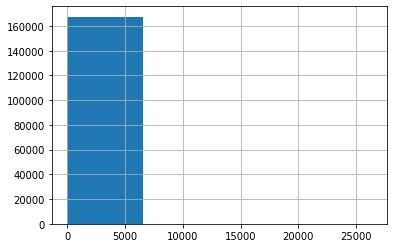

In [42]:
lens.hist(bins=4)

In [104]:
n = train_text.shape[0]
vec = TfidfVectorizer(ngram_range=(1,3), tokenizer=None,
               min_df=30, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1, stop_words='english' )
trn_term_doc = vec.fit_transform(train_text['body'])
test_term_doc = vec.transform(test_text['body'])

In [105]:
trn_term_doc

<167529x14297 sparse matrix of type '<class 'numpy.float64'>'
	with 3013517 stored elements in Compressed Sparse Row format>

In [50]:
test_term_doc

<55843x89623 sparse matrix of type '<class 'numpy.float64'>'
	with 2760363 stored elements in Compressed Sparse Row format>

In [54]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [115]:
topics=25
indexer=[]
for _ in range(0,topics):
    indexer.append(f'comp{_}')

In [116]:
nmf_model = NMF(topics)
train_topic = nmf_model.fit_transform(trn_term_doc)

In [117]:
test_topic=nmf_model.transform(test_term_doc)

In [108]:
# if you want the full topic to word correlation matrix here it is. . . . 

topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = indexer,
             columns = vec.get_feature_names())
topic_word

,00,000,000 000,000 people,000 year,000 years,000 years ago,000 years old,0001,0001f602,...,yup,zealand,zero,zhang,zika,zika virus,zinc,zone,zones,zoo
comp0,0.026,0.054,0.004,0.000,0.013,0.000,0.000,0.000,0.006,0.006,...,0.012,0.011,0.110,0.005,0.028,0.008,0.010,0.026,0.021,0.007
comp1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
comp2,0.005,0.034,0.001,0.003,0.001,0.001,0.002,0.000,0.005,0.000,...,0.000,0.003,0.005,0.008,0.002,0.001,0.005,0.005,0.005,0.001
comp3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.006,0.000,0.001,0.000,0.000,0.000,0.000,0.000
comp4,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,...,0.004,0.001,0.002,0.000,0.000,0.000,0.000,0.006,0.002,0.000
comp5,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.004,0.002,0.013,0.001,0.000,0.000,0.000,0.000,0.000,0.000
comp6,0.000,0.024,0.003,0.030,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000
comp7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
comp8,0.000,0.004,0.000,0.000,0.000,0.000,0.002,0.000,0.000,0.001,...,0.000,0.000,0.008,0.000,0.003,0.000,0.002,0.003,0.000,0.000
comp9,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.001,...,0.000,0.000,0.003,0.000,0.000,0.000,0.002,0.006,0.000,0.001


In [118]:
display_topics(nmf_model, vec.get_feature_names(), 10)


Topic  0
way, life, make, work, going, ve, better, use, day, things

Topic  1
message, reddit, reddit com, www reddit, www reddit com, com, www, amp, mods, feel

Topic  2
com, www, https, nature, https www, http, nature com, www nature, www nature com, articles

Topic  3
like, sounds, sounds like, feel like, feel, looks, looks like, just like, look like, look

Topic  4
just, just like, maybe, people just, just want, want, just don, maybe just, ll just, just need

Topic  5
science, political, sub, politics, isn, social, social science, post, scientific, science article

Topic  6
people, people don, believe, likely, people just, religious, people think, lot, poor, lot people

Topic  7
removed, comments, comments removed, deleted, comment, thread, comment removed, comments deleted, mods, half

Topic  8
does, mean, does mean, correlation, causation, doesn, correlation does, does work, brain, doesn mean

Topic  9
know, don know, didn, didn know, did, people know, want know, know know, like

In [120]:
H = pd.DataFrame(train_topic.round(5),columns = indexer)


,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,...,comp15,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24
0,0.00649,0.00000,0.00000,0.00019,0.00000,0.00000,0.00000,0.00000,0.00002,0.00043,...,0.00000,0.00003,0.00098,0.00000,0.00231,0.00000,0.00000,0.00000,0.00000,0.00000
1,0.00546,0.00918,0.00000,0.00000,0.00087,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00028,0.03442,0.00000,0.00000,0.00411,0.00084,0.00155
2,0.00206,0.00000,0.00215,0.00000,0.00000,0.00017,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00093
3,0.00000,0.00385,0.02748,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.01074,0.00000,0.00000,0.00000,0.00000,0.01214,0.00000,0.04617
4,0.00000,0.00000,0.00039,0.00000,0.00040,0.00006,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00053,0.00000,0.00000,0.00019,0.00000,0.00031,0.03901
5,0.00087,0.00417,0.02000,0.00000,0.00055,0.00000,0.00000,0.00000,0.00000,0.01774,...,0.00000,0.00061,0.00000,0.01604,0.00000,0.00000,0.00000,0.00000,0.00089,0.00000
6,0.01100,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00112,0.00000,0.00000,...,0.00000,0.00000,0.00008,0.00000,0.00000,0.00000,0.00000,0.00000,0.00102,0.00000
7,0.00209,0.00000,0.00000,0.00007,0.02277,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00088,0.00000,0.00047,0.00000,0.00454,0.00000,0.00000
8,0.00395,0.00000,0.00000,0.00007,0.00030,0.00042,0.00018,0.00000,0.00000,0.00000,...,0.00114,0.00020,0.00000,0.00000,0.00010,0.00000,0.00000,0.00000,0.00249,0.00000
9,0.00000,0.15410,0.00062,0.00205,0.00000,0.00951,0.00000,0.00425,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [121]:
Removal_df = pd.concat([H,train], axis=1)

In [123]:
Removal_group=Removal_df.groupby(['REMOVED']).mean()

In [125]:
pd.set_option('display.max_columns', 999)

In [126]:
Removal_group

,comp0,comp1,comp2,comp3,comp4,comp5,comp6,comp7,comp8,comp9,comp10,comp11,comp12,comp13,comp14,comp15,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,Unnamed: 0,score.x,created_utc.x,retrieved_on
REMOVED,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,0.005086,0.001628,0.002833,0.003338,0.002729,0.001736,0.003157,0.000571,0.002628,0.001623,0.002545,0.002179,0.002006,0.002214,0.002415,0.001355,0.002641,0.001170,0.001514,0.001119,0.00183,0.001408,0.001391,0.001594,0.002522,83836.852643,48.317586,1.512008e+09,1.514087e+09
True,0.004091,0.000916,0.000553,0.003390,0.003038,0.002080,0.003216,0.002176,0.001611,0.001620,0.001995,0.002425,0.001465,0.002169,0.003176,0.001797,0.002161,0.000382,0.001434,0.001323,0.00204,0.001445,0.000425,0.003137,0.002029,83650.912370,30.032423,1.510758e+09,1.512782e+09
